# 设计句子生成器

## 语法一：“商人”

In [4]:
merchant = '''
merchant = 寒暄 询问 需求 结尾
寒暄 = 打招呼
打招呼 = 您好 | 你好
询问 = 请问你要 | 您需要
需求 = 购买 商品 | 帮助
商品 = 食品 | 衣服 | 日用品
结尾 = 吗？
'''

## 语法二：“顾客”

In [ ]:
customer = '''
customer = 
'''

## 句子生成

In [5]:
def create_grammar(grammar_str):
    grammar = {}
    
    for grammar_line in grammar_str.split('\n'):
        if not grammar_line.strip():
            continue
            
        exp, stmt = grammar_line.split('=')
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]

    return grammar

In [6]:
from random import choice

def generate(gram, target):
    if target not in gram:
        return target
    return ''.join([generate(gram, t) for t in choice(gram[target])])

In [7]:
grammar = create_grammar(merchant)
grammar

{'merchant': [['寒暄', '询问', '需求', '结尾']],
 '寒暄': [['打招呼']],
 '打招呼': [['您好'], ['你好']],
 '询问': [['请问你要'], ['您需要']],
 '需求': [['购买', '商品'], ['帮助']],
 '商品': [['食品'], ['衣服'], ['日用品']],
 '结尾': [['吗？']]}

In [8]:
sentence = generate(grammar, 'merchant')
sentence

'你好您需要帮助吗？'

## 定义generate_n函数生成n个句子

In [9]:
def generate_n(gram, target, n):
    for i in range(0,n):
        sentence = generate(gram, target)
        print(sentence)

In [34]:
generate_n(grammar, 'merchant', 10)

您好您需要帮助吗？
你好您需要购买衣服吗？
您好请问你要购买食品吗？
您好您需要帮助吗？
你好您需要购买食品吗？
你好请问你要购买食品吗？
您好您需要帮助吗？
你好请问你要帮助吗？
您好您需要购买食品吗？
你好您需要帮助吗？


# 使用新数据源完成语言模型的训练

## 预处理提取文字序列

In [15]:
line = "119 ++$++ life-insurance ++$++ 定期人寿保险在特定年龄结束吗？ ++$++ Does  Term  Life  Insurance  End  At  A  Certain  Age?"
no, category, text_chn, text_eng = line.split('++$++')
text_chn

' 定期人寿保险在特定年龄结束吗？ '

In [16]:
text_list = []
with open('train.txt', encoding='utf-8') as raw_text:
    for line in raw_text:
        no, category, text_chn, text_eng = line.split('++$++')
        text_list.append(text_chn)

In [17]:
len(text_list)

12889

In [18]:
import re
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [19]:
token(text_list[110])

['可以在乳腺癌后获得人身保险吗']

In [20]:
text_clean = [''.join(token(str(a)))for a in text_list]

## 分词获取所有词

In [21]:
import jieba

def cut(string):
    return list(jieba.cut(string))

In [22]:
TOKEN = []

for a in text_clean:
    TOKEN += cut(a)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\vick_\AppData\Local\Temp\jieba.cache
Loading model cost 1.019 seconds.
Prefix dict has been built succesfully.


In [23]:
TOKEN

['法律',
 '要求',
 '残疾',
 '保险',
 '吗',
 '债权人',
 '可以',
 '在',
 '死',
 '后',
 '人寿保险',
 '吗',
 '旅行者',
 '保险',
 '有',
 '租赁',
 '保险',
 '吗',
 '我',
 '可以',
 '开',
 '一辆',
 '没有',
 '保险',
 '的',
 '新车',
 '吗',
 '人寿保险',
 '的',
 '现金',
 '转',
 '出',
 '价值',
 '是否',
 '应',
 '纳税',
 '如何',
 '报告',
 '年',
 '金',
 '收入',
 'AAA',
 '家庭',
 '保险',
 '涵盖',
 '什么',
 '什么',
 '是',
 '简单',
 '的',
 '退休',
 '计划',
 '社会保险',
 '残疾',
 '保险',
 '是',
 '什么',
 '汽车保险',
 '是否',
 '预付',
 '医疗保险',
 'B',
 '部分',
 '盖',
 '什么',
 '退伍军人',
 '能否',
 '获得',
 '人寿保险',
 '我',
 '的',
 '房主',
 '保险',
 '是否',
 '包括',
 '失去',
 '的',
 '结婚戒指',
 '分配',
 '风险',
 '汽车保险',
 '如何',
 '工作',
 '我',
 '的',
 '男朋友',
 '可以',
 '加',
 '我',
 '的',
 '汽车保险',
 '吗',
 '我',
 '是否',
 '需要',
 '提交',
 '私人',
 '财产',
 '车祸',
 '索赔',
 '的',
 '警察',
 '报告',
 '全',
 '覆盖',
 '汽车保险',
 '盖',
 '修理',
 '人生',
 '在',
 '伊斯兰教',
 '中',
 '是否',
 '可以',
 '接受',
 '健康',
 '保险',
 '是否',
 '覆盖',
 '管道',
 '逆转',
 '如果',
 '您',
 '已经',
 '诊断',
 '为',
 '乳腺癌',
 '您',
 '可以',
 '获得',
 '多大',
 '的',
 '人寿保险',
 '我',
 '需要',
 '注册',
 '医疗保险',
 '短期',
 '残疾',
 '保险',
 '是否',
 '工作',
 '房主',
 '保险',
 

In [24]:
from collections import Counter
words_count = Counter(TOKEN)
words_count.most_common(100)

[('保险', 5013),
 ('的', 3220),
 ('人寿保险', 2962),
 ('什么', 2677),
 ('吗', 2479),
 ('是', 2347),
 ('我', 2054),
 ('是否', 1862),
 ('可以', 1704),
 ('健康', 1513),
 ('如何', 1294),
 ('医疗保险', 1269),
 ('多少', 1252),
 ('汽车保险', 1189),
 ('在', 913),
 ('覆盖', 848),
 ('你', 827),
 ('有', 775),
 ('残疾', 724),
 ('房主', 714),
 ('需要', 612),
 ('计划', 594),
 ('获得', 578),
 ('年', 572),
 ('为什么', 572),
 ('家庭', 561),
 ('谁', 554),
 ('长期', 536),
 ('支付', 532),
 ('金', 494),
 ('护理', 479),
 ('涵盖', 449),
 ('退休', 394),
 ('购买', 357),
 ('应该', 344),
 ('得到', 304),
 ('租客', 287),
 ('时候', 280),
 ('何时', 276),
 ('汽车', 270),
 ('最好', 261),
 ('如果', 258),
 ('政策', 256),
 ('租金', 252),
 ('为', 250),
 ('中', 246),
 ('哪里', 245),
 ('会', 241),
 ('Medigap', 237),
 ('提供', 233),
 ('一个', 220),
 ('没有', 215),
 ('保险费用', 203),
 ('工作', 200),
 ('影响', 199),
 ('钱', 193),
 ('要', 192),
 ('费用', 190),
 ('公司', 189),
 ('买', 188),
 ('您', 183),
 ('租赁', 179),
 ('保险公司', 177),
 ('部分', 171),
 ('能', 171),
 ('好', 170),
 ('全', 161),
 ('人寿', 161),
 ('索赔', 157),
 ('便宜', 157),
 ('从', 157

## 绘制词语分布

In [25]:
frequiences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(100)]

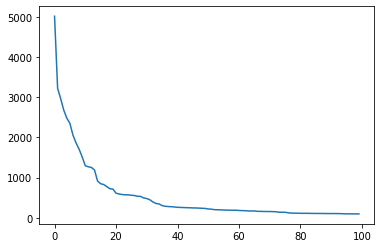

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, frequiences)

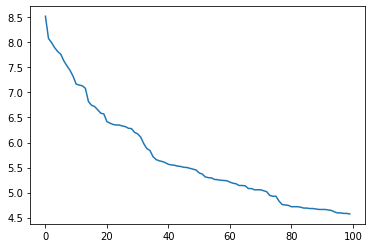

In [27]:
import numpy as np

plt.plot(x, np.log(frequiences))

## 计算1-gram

In [28]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [29]:
prob_1('我们')

0.0007472371888150391

## 计算2-gram

In [31]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [32]:
TOKEN_2_GRAM[:10]

['法律要求', '要求残疾', '残疾保险', '保险吗', '吗债权人', '债权人可以', '可以在', '在死', '死后', '后人寿保险']

In [33]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [34]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [35]:
prob_2('我们', '在')

1.310976808820252e-05

## 句子合理性

In [36]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [37]:
get_probablity('我要买保险')

3.4373203865290634e-10

In [38]:
get_probablity('飞插你又有')

2.9537928599120775e-20

# 获得最优质的的语言

In [39]:
def generate_best(grammar_str, lauguage_model, n):
    grammar = create_grammar(grammar_str)
    sentences = [generate(grammar, 'merchant') for i in range(0, n)]
    sentences_score = []
    for sentence in sentences:
        sentences_score.append((lauguage_model(sentence), sentence))
    sorted(sentences_score, key=lambda x: x[0], reverse=True)
    return sentences_score[0][1]

In [46]:
best_sentence = generate_best(merchant, get_probablity, 10)
best_sentence

'您好您需要购买日用品吗？'

# 后记

**Q: 这个模型有什么问题？ 你准备如何提升？**

A: 模型主要问题是用于训练的语料较少或者是针对于某个领域、专业性问题的语料。在计算语言合理程度的概率时可能存在问题。可以通过获取更加一般或者契合生成语法场景的对话语料来作为语言模型的训练集。